In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from dotenv import load_dotenv
import os

load_dotenv()

password = os.getenv('PG_PASSWORD')


0. Extract data

In [3]:
from sqlalchemy import create_engine

database_name = 'telcom'
table_name= 'xdr_data'

connection_params = { "host": "localhost", "user": "postgres", "password": password,
                    "port": "5432", "database": database_name}

engine = create_engine(f"postgresql+psycopg2://{connection_params['user']}:{connection_params['password']}@{connection_params['host']}:{connection_params['port']}/{connection_params['database']}")

sql_query = 'SELECT * FROM xdr_data'

df = pd.read_sql(sql_query, con= engine)


1. Data screening

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
print(df.head())

      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   

Task 2.1
Top handset types and handset manufucturers.
The marketing team can use the following results to highlight data plans and services that complement the features and capabilities of popular handsets from Apple, Samsung, and Huawei.

In [5]:
top_10_handsets = df['Handset Type'].value_counts().head(10)
print("Top 10 Handsets Used by Customers:", top_10_handsets)
print("\n")

df['Manufacturer'] = df['Handset Type'].str.split().str[0]
top_3_manufacturers = df['Manufacturer'].value_counts().head(3)
print("Top 3 Handset Manufacturers:", top_3_manufacturers)
print("\n")

top_5_per_manufacturer = {}
for manufacturer in top_3_manufacturers.index:
    top_5_per_manufacturer[manufacturer] = df[df['Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)

print("Top 5 Handsets per Top 3 Manufacturers:")
for manufacturer, top_5 in top_5_per_manufacturer.items():
    print(f"\nManufacturer: {manufacturer}", top_5)
    print("\n")

Top 10 Handsets Used by Customers: Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


Top 3 Handset Manufacturers: Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


Top 5 Handsets per Top 3 Manufacturers:

Manufacturer: Apple Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64



Manufacturer: Samsung Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy

Overview of the users’ behaviour in social media applications

In [6]:
relevant_columns = ['MSISDN/Number', 'Bearer Id', 'Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)', 
                    'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 
                    'Google DL (Bytes)', 'Google UL (Bytes)', 
                    'Email DL (Bytes)', 'Email UL (Bytes)', 
                    'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 
                    'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 
                    'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 
                    'Other DL (Bytes)', 'Other UL (Bytes)']

df_filtered = df[relevant_columns]

user_behavior_summary = df_filtered.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',
    'Dur. (ms)': 'sum',
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum',
    'Social Media DL (Bytes)': 'sum', 'Social Media UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum', 'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum', 'Email UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum', 'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum', 'Netflix UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum', 'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum', 'Other UL (Bytes)': 'sum'
}).reset_index()

user_behavior_summary.columns = ['MSISDN/Number', 'Num_of_xDR_sessions', 'Total_session_duration', 
                                'Total_DL_data', 'Total_UL_data', 
                                'Social_Media_DL', 'Social_Media_UL', 
                                'Google_DL', 'Google_UL', 
                                'Email_DL', 'Email_UL', 
                                'Youtube_DL', 'Youtube_UL', 
                                'Netflix_DL', 'Netflix_UL', 
                                'Gaming_DL', 'Gaming_UL', 
                                'Other_DL', 'Other_UL']

print("User Behavior Summary:")
print(user_behavior_summary.head())


User Behavior Summary:
   MSISDN/Number  Num_of_xDR_sessions  Total_session_duration  Total_DL_data  \
0   3.360100e+10                    1                116720.0   8.426375e+08   
1   3.360100e+10                    1                181230.0   1.207552e+08   
2   3.360100e+10                    1                134969.0   5.566597e+08   
3   3.360101e+10                    1                 49878.0   4.019932e+08   
4   3.360101e+10                    2                 37104.0   1.363130e+09   

   Total_UL_data  Social_Media_DL  Social_Media_UL   Google_DL  Google_UL  \
0     36053108.0        2206504.0          25631.0   3337123.0  1051882.0   
1     36104459.0        2598548.0          62017.0   4197697.0  1137166.0   
2     39306820.0        3148004.0          47619.0   3343483.0    99643.0   
3     20327526.0         251469.0          28825.0   5937765.0  3740728.0   
4     94280527.0        2861230.0          51312.0  13728668.0  4770948.0   

    Email_DL   Email_UL  Youtube_

EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

Missing Values

In [9]:
df.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

Descriptive Analysis

In [10]:
df['Handset Type'].describe()

count               149429
unique                1396
top       Huawei B528S-23A
freq                 19752
Name: Handset Type, dtype: object

In [11]:
df['Handset Manufacturer'].describe()

count     149429
unique       170
top        Apple
freq       59565
Name: Handset Manufacturer, dtype: object

In [12]:
df['Dur. (ms).1'].describe()

count    1.500000e+05
mean     1.046091e+08
std      8.103761e+07
min      7.142988e+06
25%      5.744079e+07
50%      8.639998e+07
75%      1.324308e+08
max      1.859336e+09
Name: Dur. (ms).1, dtype: float64

In [13]:
df['Total DL (Bytes)'].describe()

count    1.500000e+05
mean     4.546434e+08
std      2.441429e+08
min      7.114041e+06
25%      2.431068e+08
50%      4.558411e+08
75%      6.657055e+08
max      9.029696e+08
Name: Total DL (Bytes), dtype: float64

In [83]:
df['Total UL (Bytes)'].describe()

count          100.00
mean    40,030,965.70
std     11,114,505.08
min     11,065,239.00
25%     32,177,786.00
50%     40,186,626.00
75%     48,700,444.00
max     61,407,563.00
Name: Total UL (Bytes), dtype: float64

2. Handling Missing data

In [7]:
def percent_missing(df):

    totalCells = np.prod(df.shape)

    missingCount = df.isnull().sum()

    totalMissing = missingCount.sum()

    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

In [8]:
# percent missing of total data
percent_missing(df)

The dataset contains 12.29 % missing values.


In [9]:
percent_missing(df['Handset Type'])

The dataset contains 0.38 % missing values.


In [10]:
# percent missing of total data
percent_missing(df['Handset Manufacturer'])

The dataset contains 0.38 % missing values.


In [11]:
percent_missing(df['TCP DL Retrans. Vol (Bytes)'])

The dataset contains 58.76 % missing values.


In [12]:
percent_missing(df['TCP UL Retrans. Vol (Bytes)'])

The dataset contains 64.43 % missing values.


In [13]:
percent_missing(df['HTTP DL (Bytes)'])

The dataset contains 54.32 % missing values.


In [14]:
percent_missing(df['Avg RTT DL (ms)'])

The dataset contains 18.55 % missing values.


In [15]:

percent_missing(df['Avg RTT UL (ms)'])

The dataset contains 18.54 % missing values.


2.1 Determine Skewness and decide whether to fill with mean or median

<Axes: >

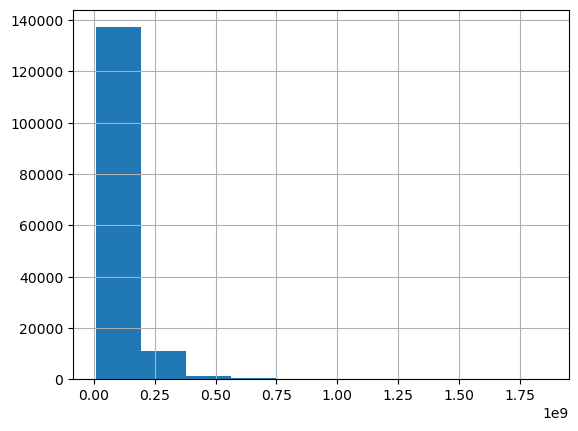

In [29]:
df['Dur. (ms).1'].hist()

<Axes: >

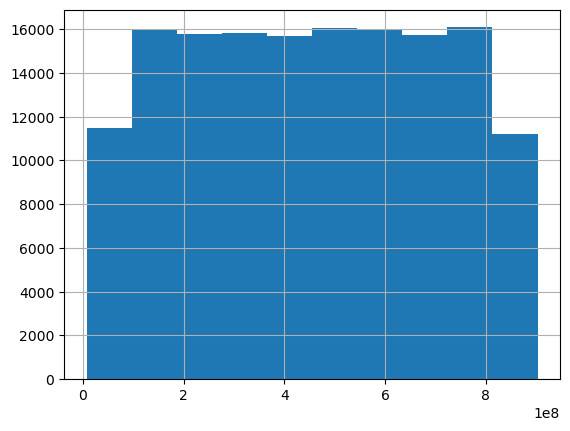

In [30]:
df['Total DL (Bytes)'].hist()

<Axes: >

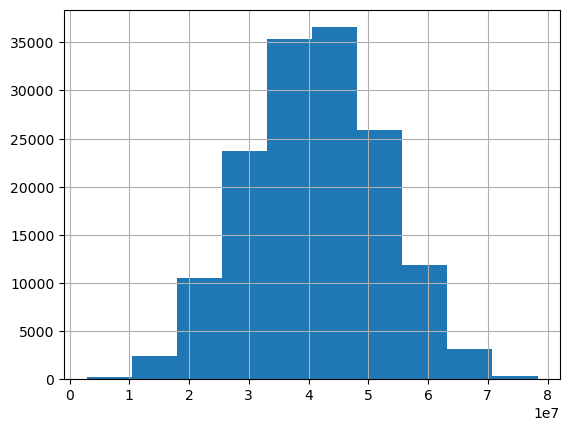

In [31]:
df['Total UL (Bytes)'].hist()

d:\tenx\user-analytics-week1\.conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


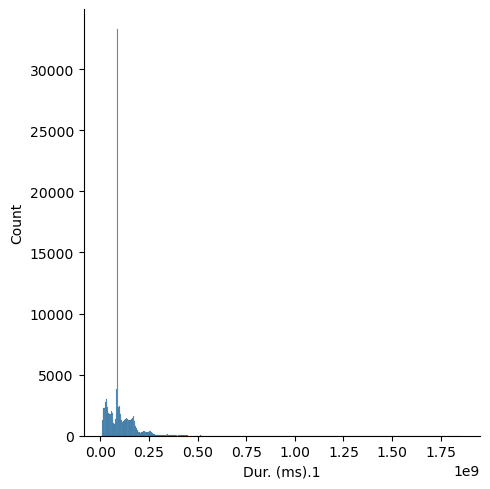

In [38]:
sns.displot(data=df, x=df['Dur. (ms).1'])

In [41]:
df.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

Drop fields with more than 30% missing values

In [16]:
df_clean = df.drop(['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B'], axis=1)
df_clean.shape

(150001, 46)

In [17]:
df_clean.isna().sum()

Bearer Id                           991
Start                                 1
Start ms                              1
End                                   1
End ms                                1
Dur. (ms)                             1
IMSI                                570
MSISDN/Number                      1066
IMEI                                572
Last Location Name                 1153
Avg RTT DL (ms)                   27829
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
Activity Duration DL (ms)             1
Activity Duration UL (ms)             1
Dur. (ms).1                           1


In [79]:
df_clean['Handset Manufacturer'].unique()

array(['Samsung', 'undefined', 'Huawei', 'Apple', 'Zte',
       'TP-Link Technologies Co Ltd', 'Ertebat Hamrah Guya Arvand',
       'Wiko Global Sasu', None, 'TCL Communication Ltd',
       'Oneplus Technology (Shenzhen) Co Ltd', 'Zebra Technologies Corp.',
       'Nokia', 'Wiko', 'Tcl Communication Ltd', 'ZTE', 'Lenovo',
       'Asustek', 'Xiaomi Communications Co Ltd', 'Rim', 'Hmd Global Oy',
       'Sony Mobile Communications AB', 'D-Link Corporation', 'Wct',
       'Dn Electronics', 'Sony Mobile Communications Ab', 'Netgear Inc',
       'Neel Enterprise', 'Teletalk Pvt Ltd', 'DDM Brands LLC',
       'Tp-Link Technologies Co Ltd', 'Sierra Wireless', 'Google Inc',
       'Shenzhen Chainway Information Technology Co Ltd',
       'Microsoft Mobile Oy', 'Htc', 'Crosscall',
       'Shenzhen Kdi Communication Co Ltd',
       'Simcom Wireless Solutions Co Ltd',
       'Qingdao Hisense Communications Co Ltd', 'Lg', 'Archos Sa',
       'Hewlett-Packard', 'Spa Condor Electronics',
       'Son

In [26]:
df_ffill = df_clean.fillna(method='ffill')

df_bfill = df_clean.fillna(method='bfill')

C:\Users\PC\AppData\Local\Temp\ipykernel_8504\1998551111.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df_clean.fillna(method='ffill')
C:\Users\PC\AppData\Local\Temp\ipykernel_8504\1998551111.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill = df_clean.fillna(method='bfill')


3. Visualizations

Python functions

In [29]:
# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

def format_float(value):
    return f'{value:,.2f}'

def find_agg(df:pd.DataFrame, agg_column:str, agg_metric:str, col_name:str, top:int, order=False )->pd.DataFrame:

    new_df = df.groupby(agg_column)[agg_column].agg(agg_metric).reset_index(name=col_name).\
                        sort_values(by=col_name, ascending=order)[:top]

    return new_df

def convert_bytes_to_megabytes(df, bytes_data):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytesof that value

        Args:
        -----
        df: dataframe
        bytes_data: column with bytes values

        Returns:
        --------
        A series
    """

    megabyte = 1*10e+5
    df[bytes_data] = df[bytes_data] / megabyte
    return df[bytes_data]

def fix_outlier(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].median(),df[column])

    return df[column]


###################################PLOTTING FUNCTIONS###################################

def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()


pd.options.display.float_format = format_float

In [30]:
df_clean['Total DL (Bytes)'].min()

7114041.0

Graphical Univariate analysis

Numerical variables

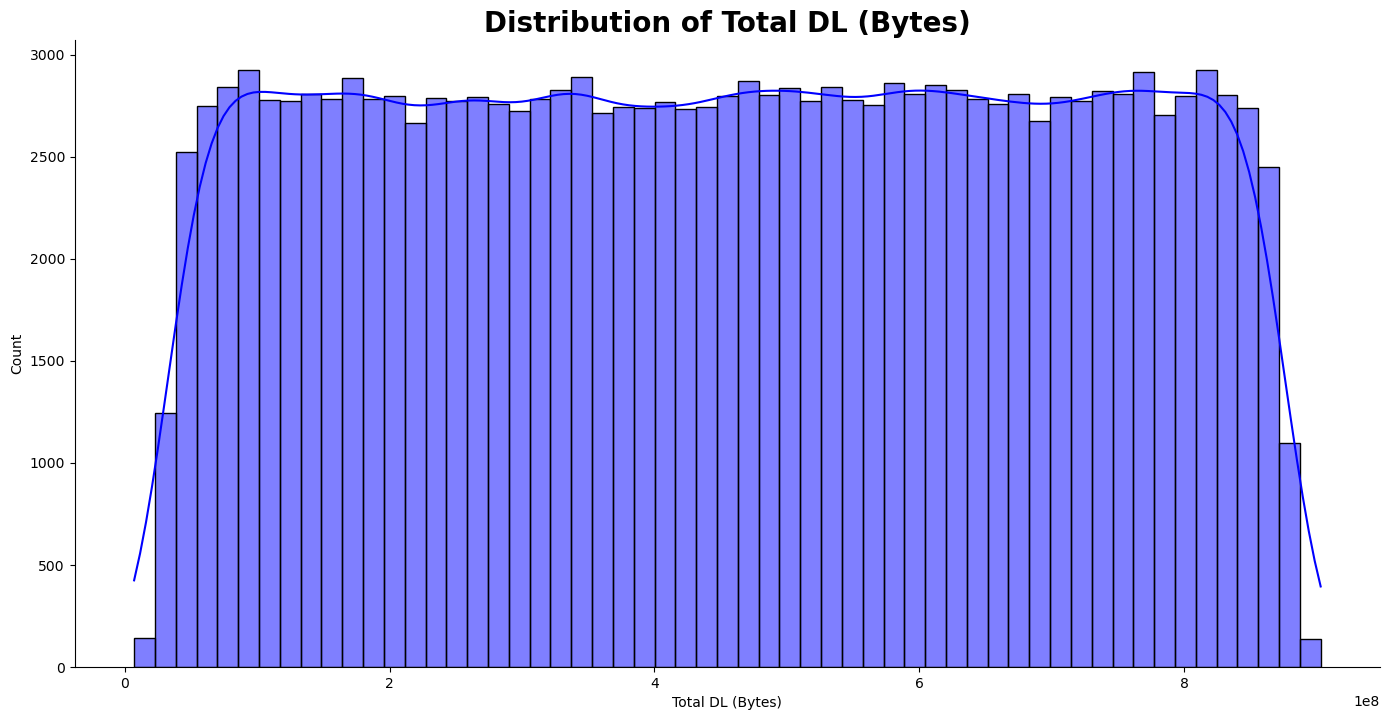

In [33]:
plot_hist(df_clean, "Total DL (Bytes)", "blue")

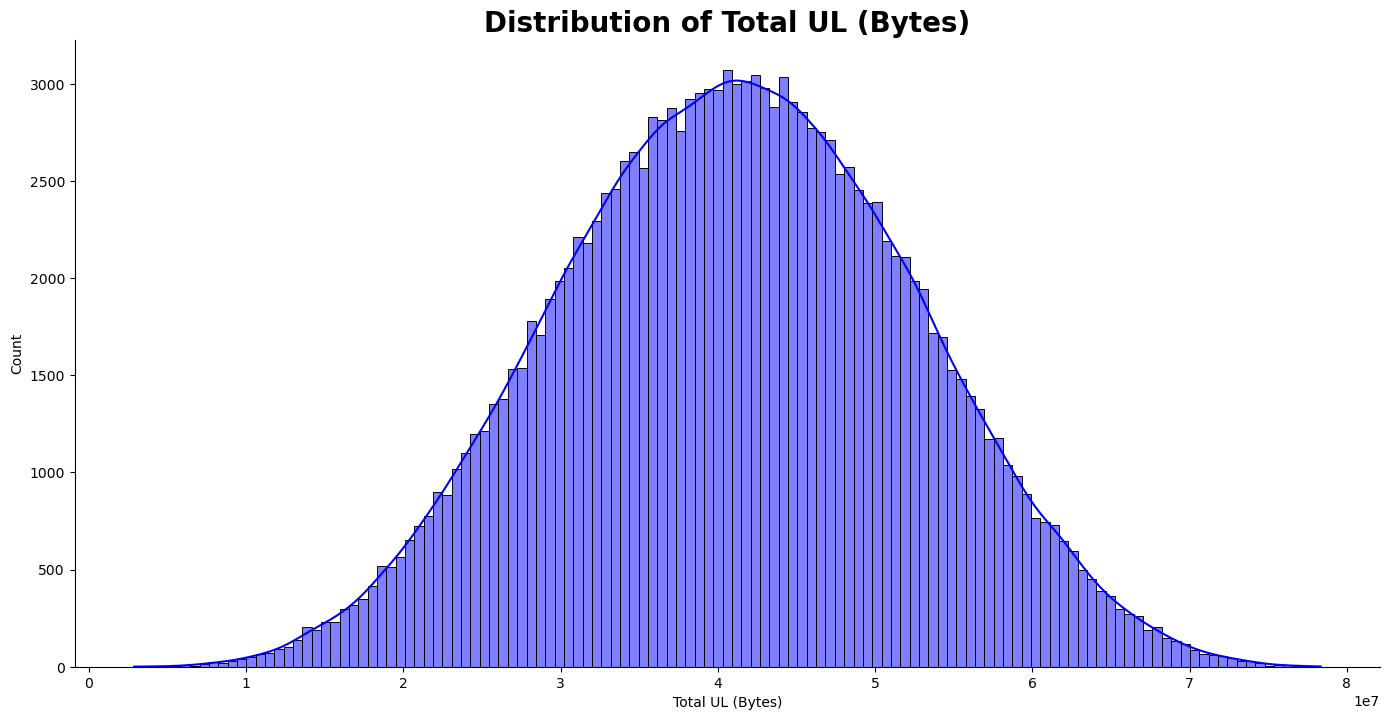

In [34]:
plot_hist(df_clean, "Total UL (Bytes)", "blue")

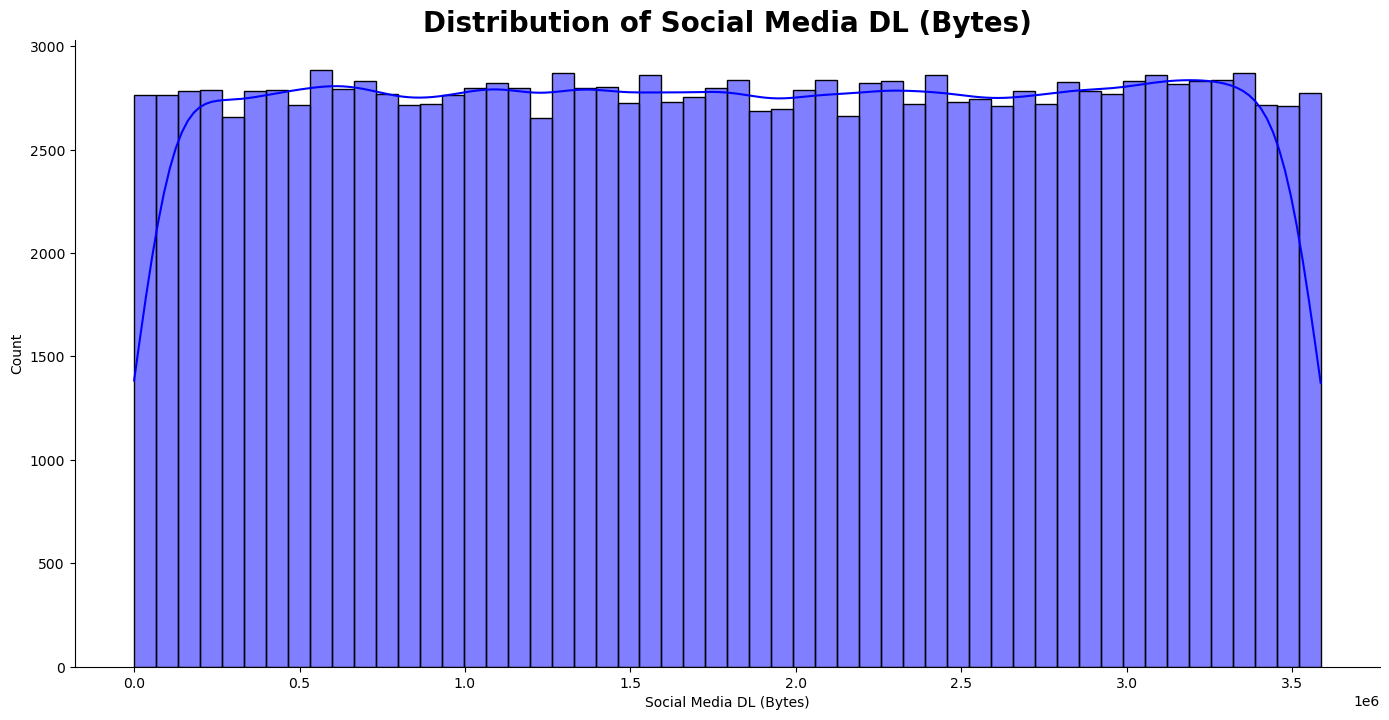

In [35]:
plot_hist(df_clean, "Social Media DL (Bytes)", "blue")

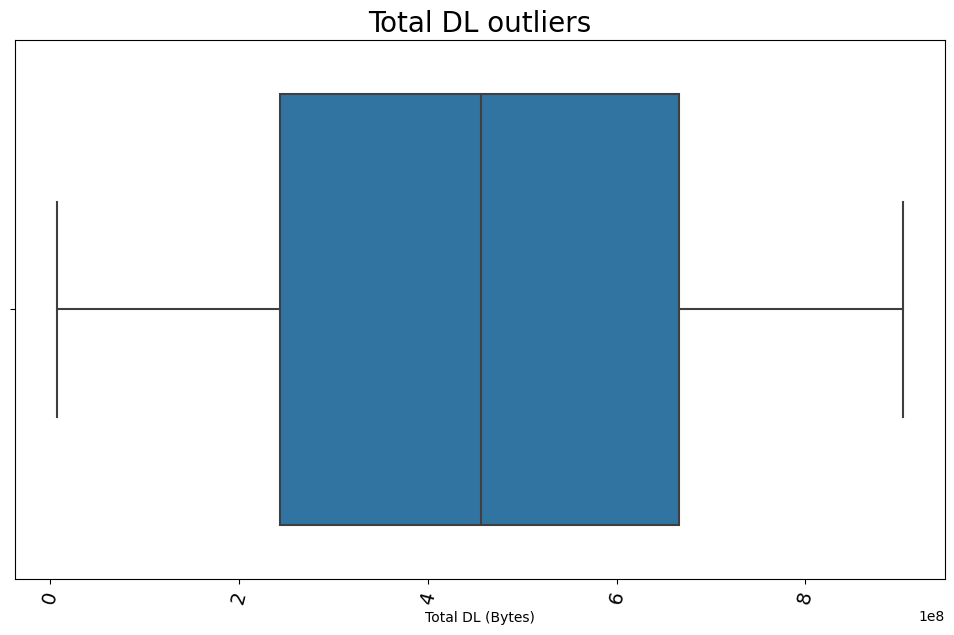

In [37]:
plot_box(df_clean, "Total DL (Bytes)", "Total DL outliers")

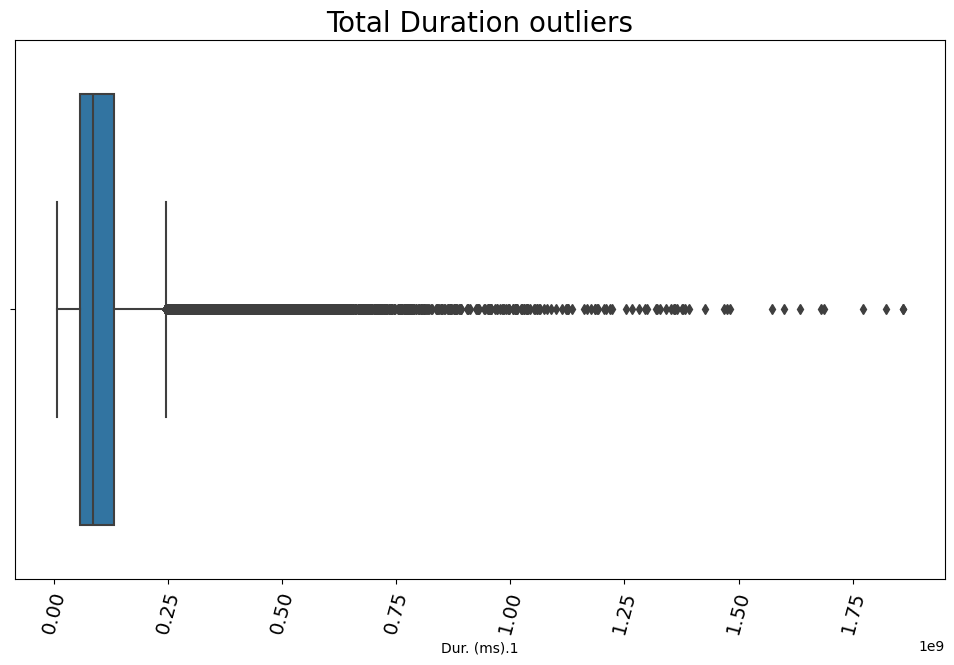

In [39]:
plot_box(df_clean, "Dur. (ms).1", "Total Duration outliers")

In [40]:
df_clean["Dur. (ms).1"] = fix_outlier(df_clean, "Dur. (ms).1")

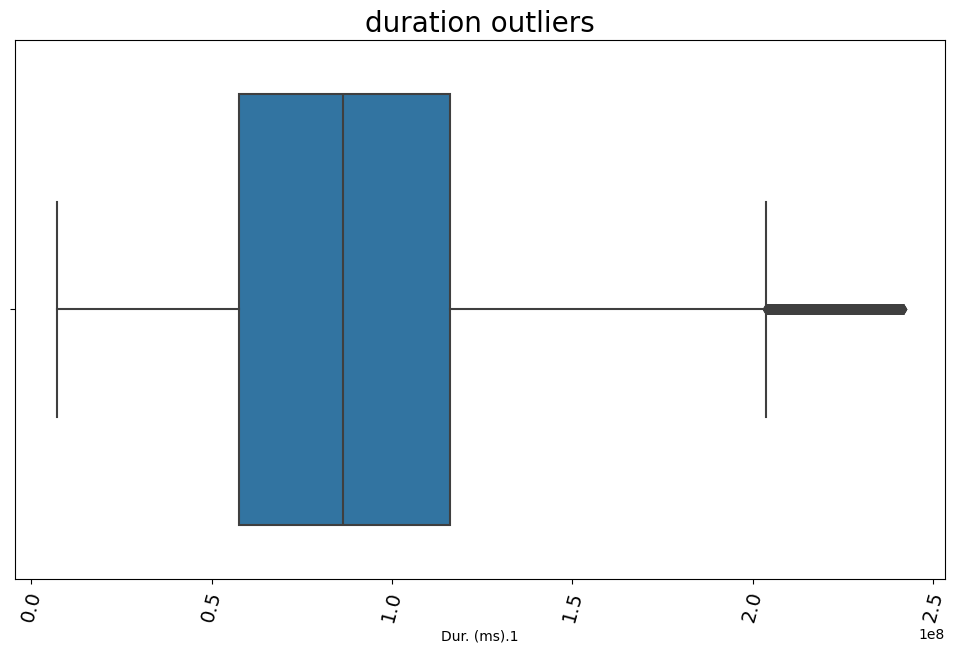

In [41]:
plot_box(df_clean, "Fixed Dur. (ms).1", "duration outliers")

Categorical variables

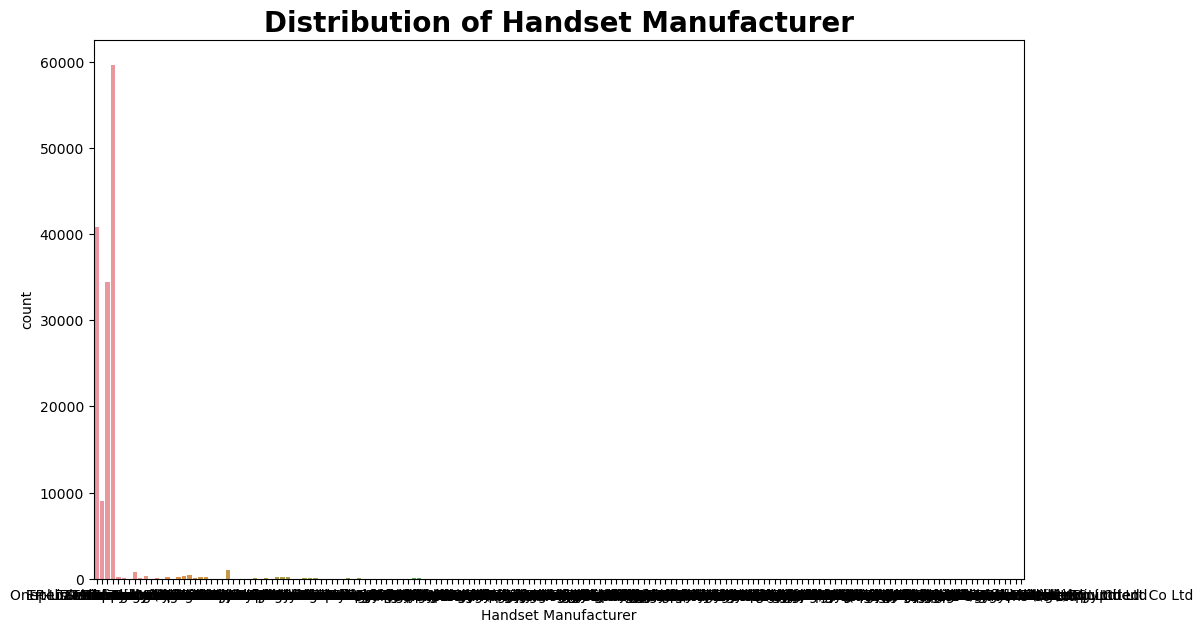

In [43]:
plot_count(df_clean, "Handset Manufacturer")

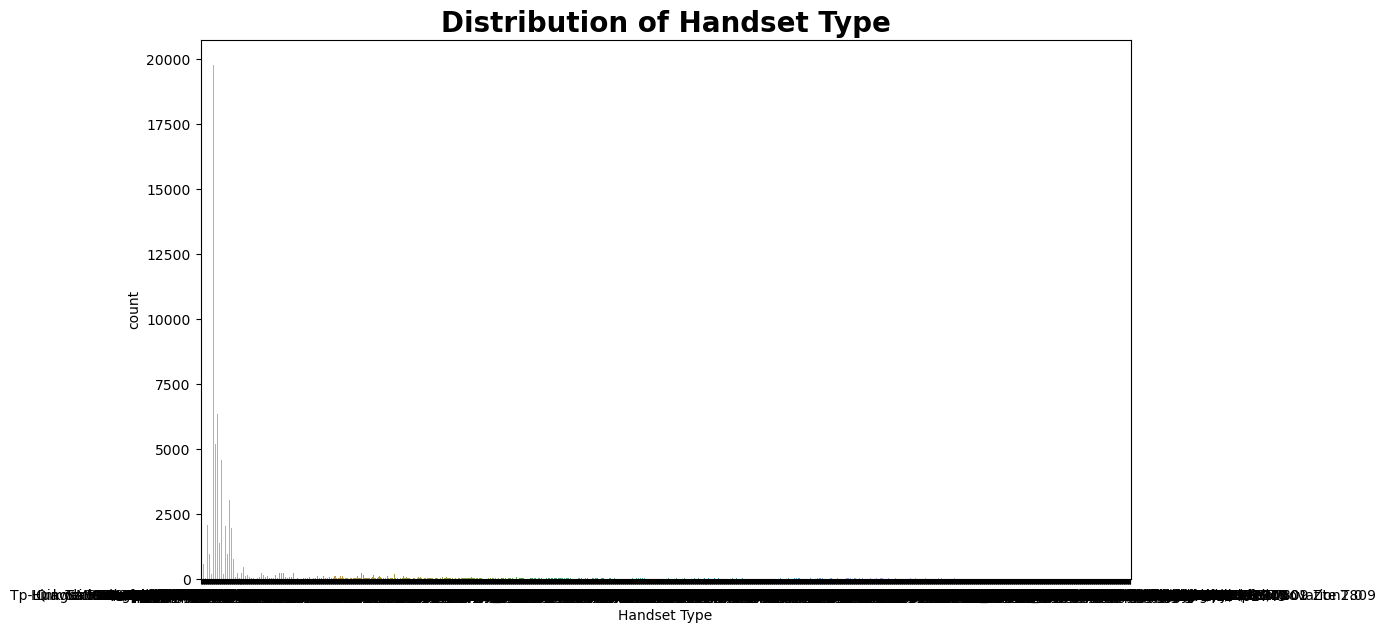

In [44]:
plot_count(df_clean, "Handset Type")

Bivariate Analysis

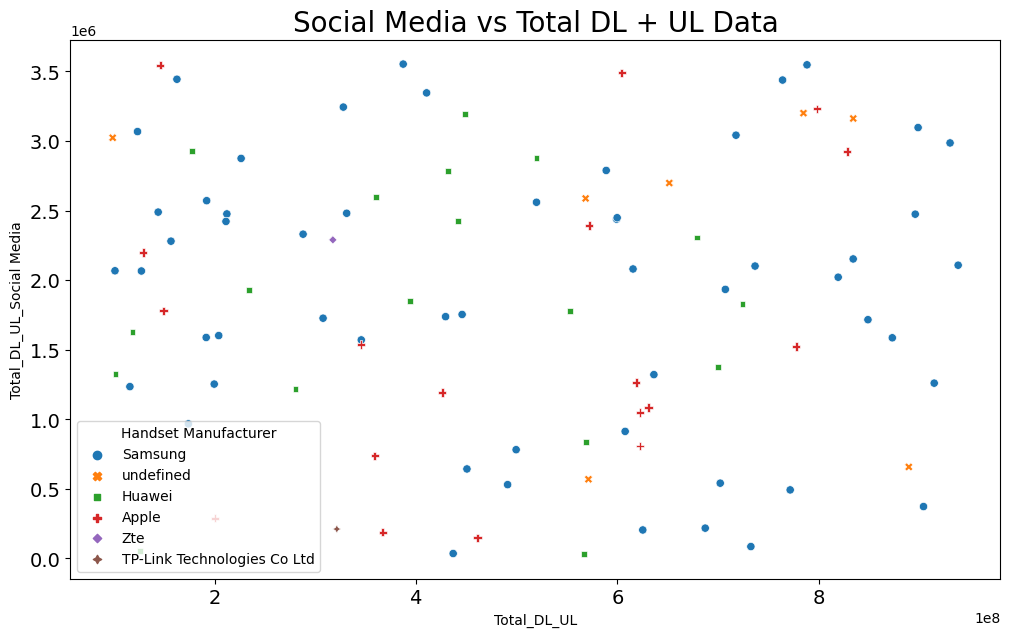

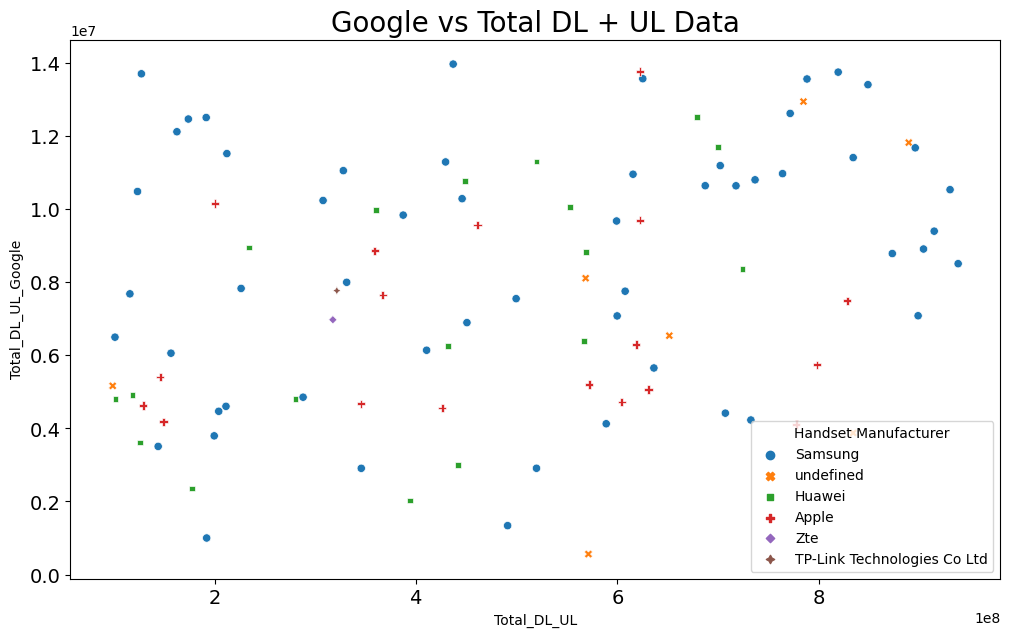

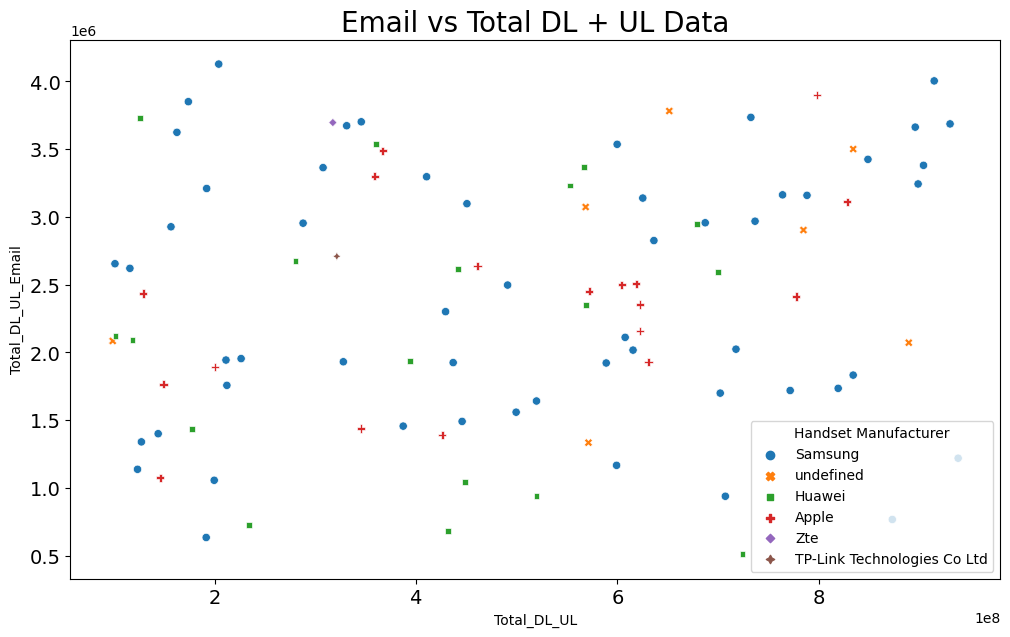

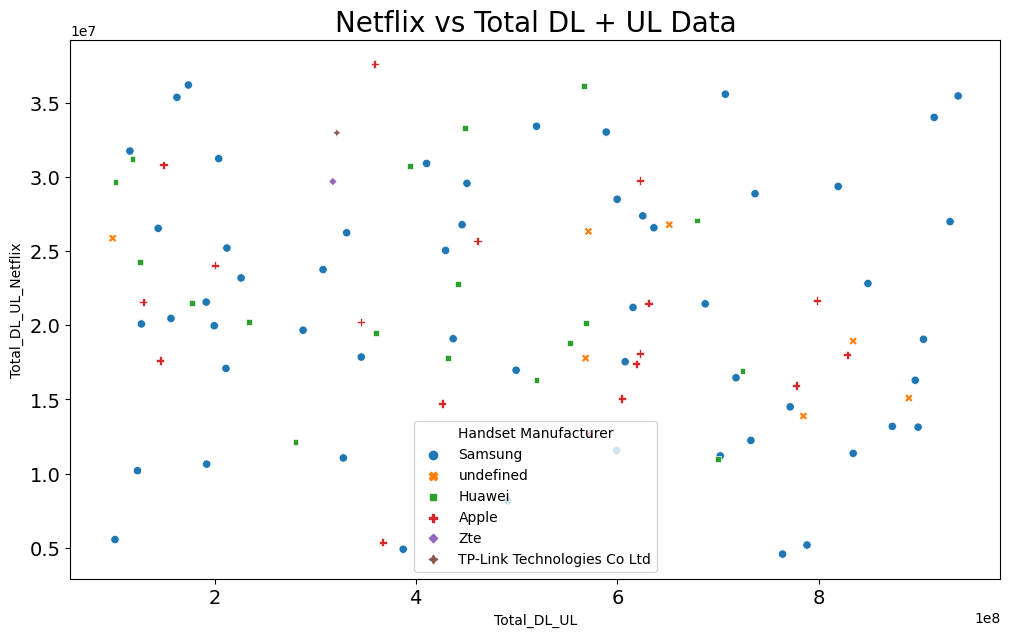

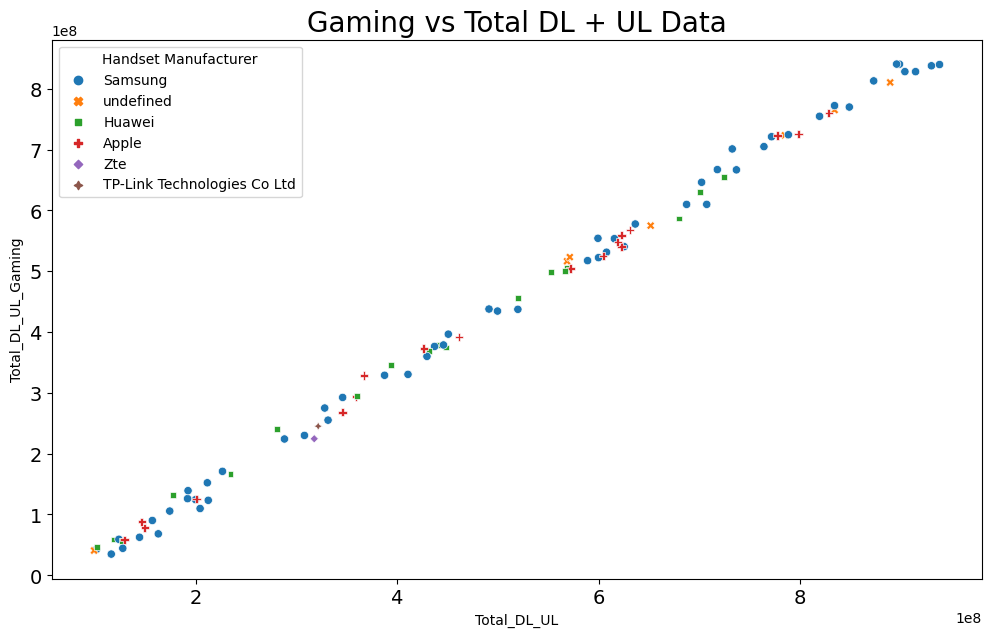

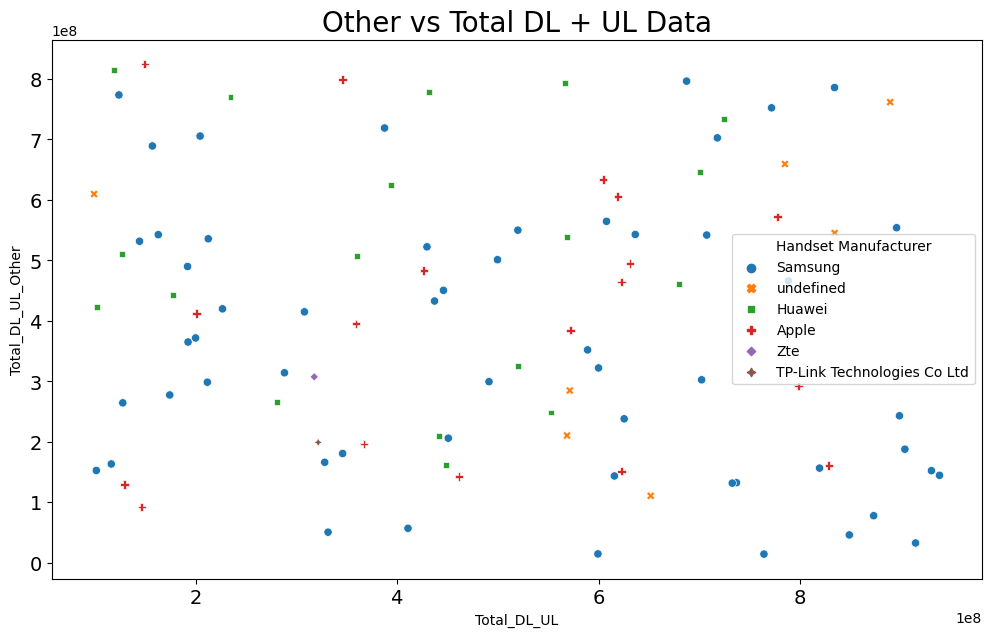

In [62]:
df = df_clean.head(100)
applications = ['Social Media', 'Google', 'Email', 'Netflix', 'Gaming', 'Other']
for app in applications:
    df[f'Total_DL_UL_{app}'] = df[f'{app} DL (Bytes)'] + df[f'{app} UL (Bytes)']

for app in applications:
    plot_scatter(df, x_col='Total_DL_UL', y_col=f'Total_DL_UL_{app}', hue='Handset Manufacturer', style='Handset Manufacturer', title=f'{app} vs Total DL + UL Data')

<Figure size 1200x1000 with 0 Axes>

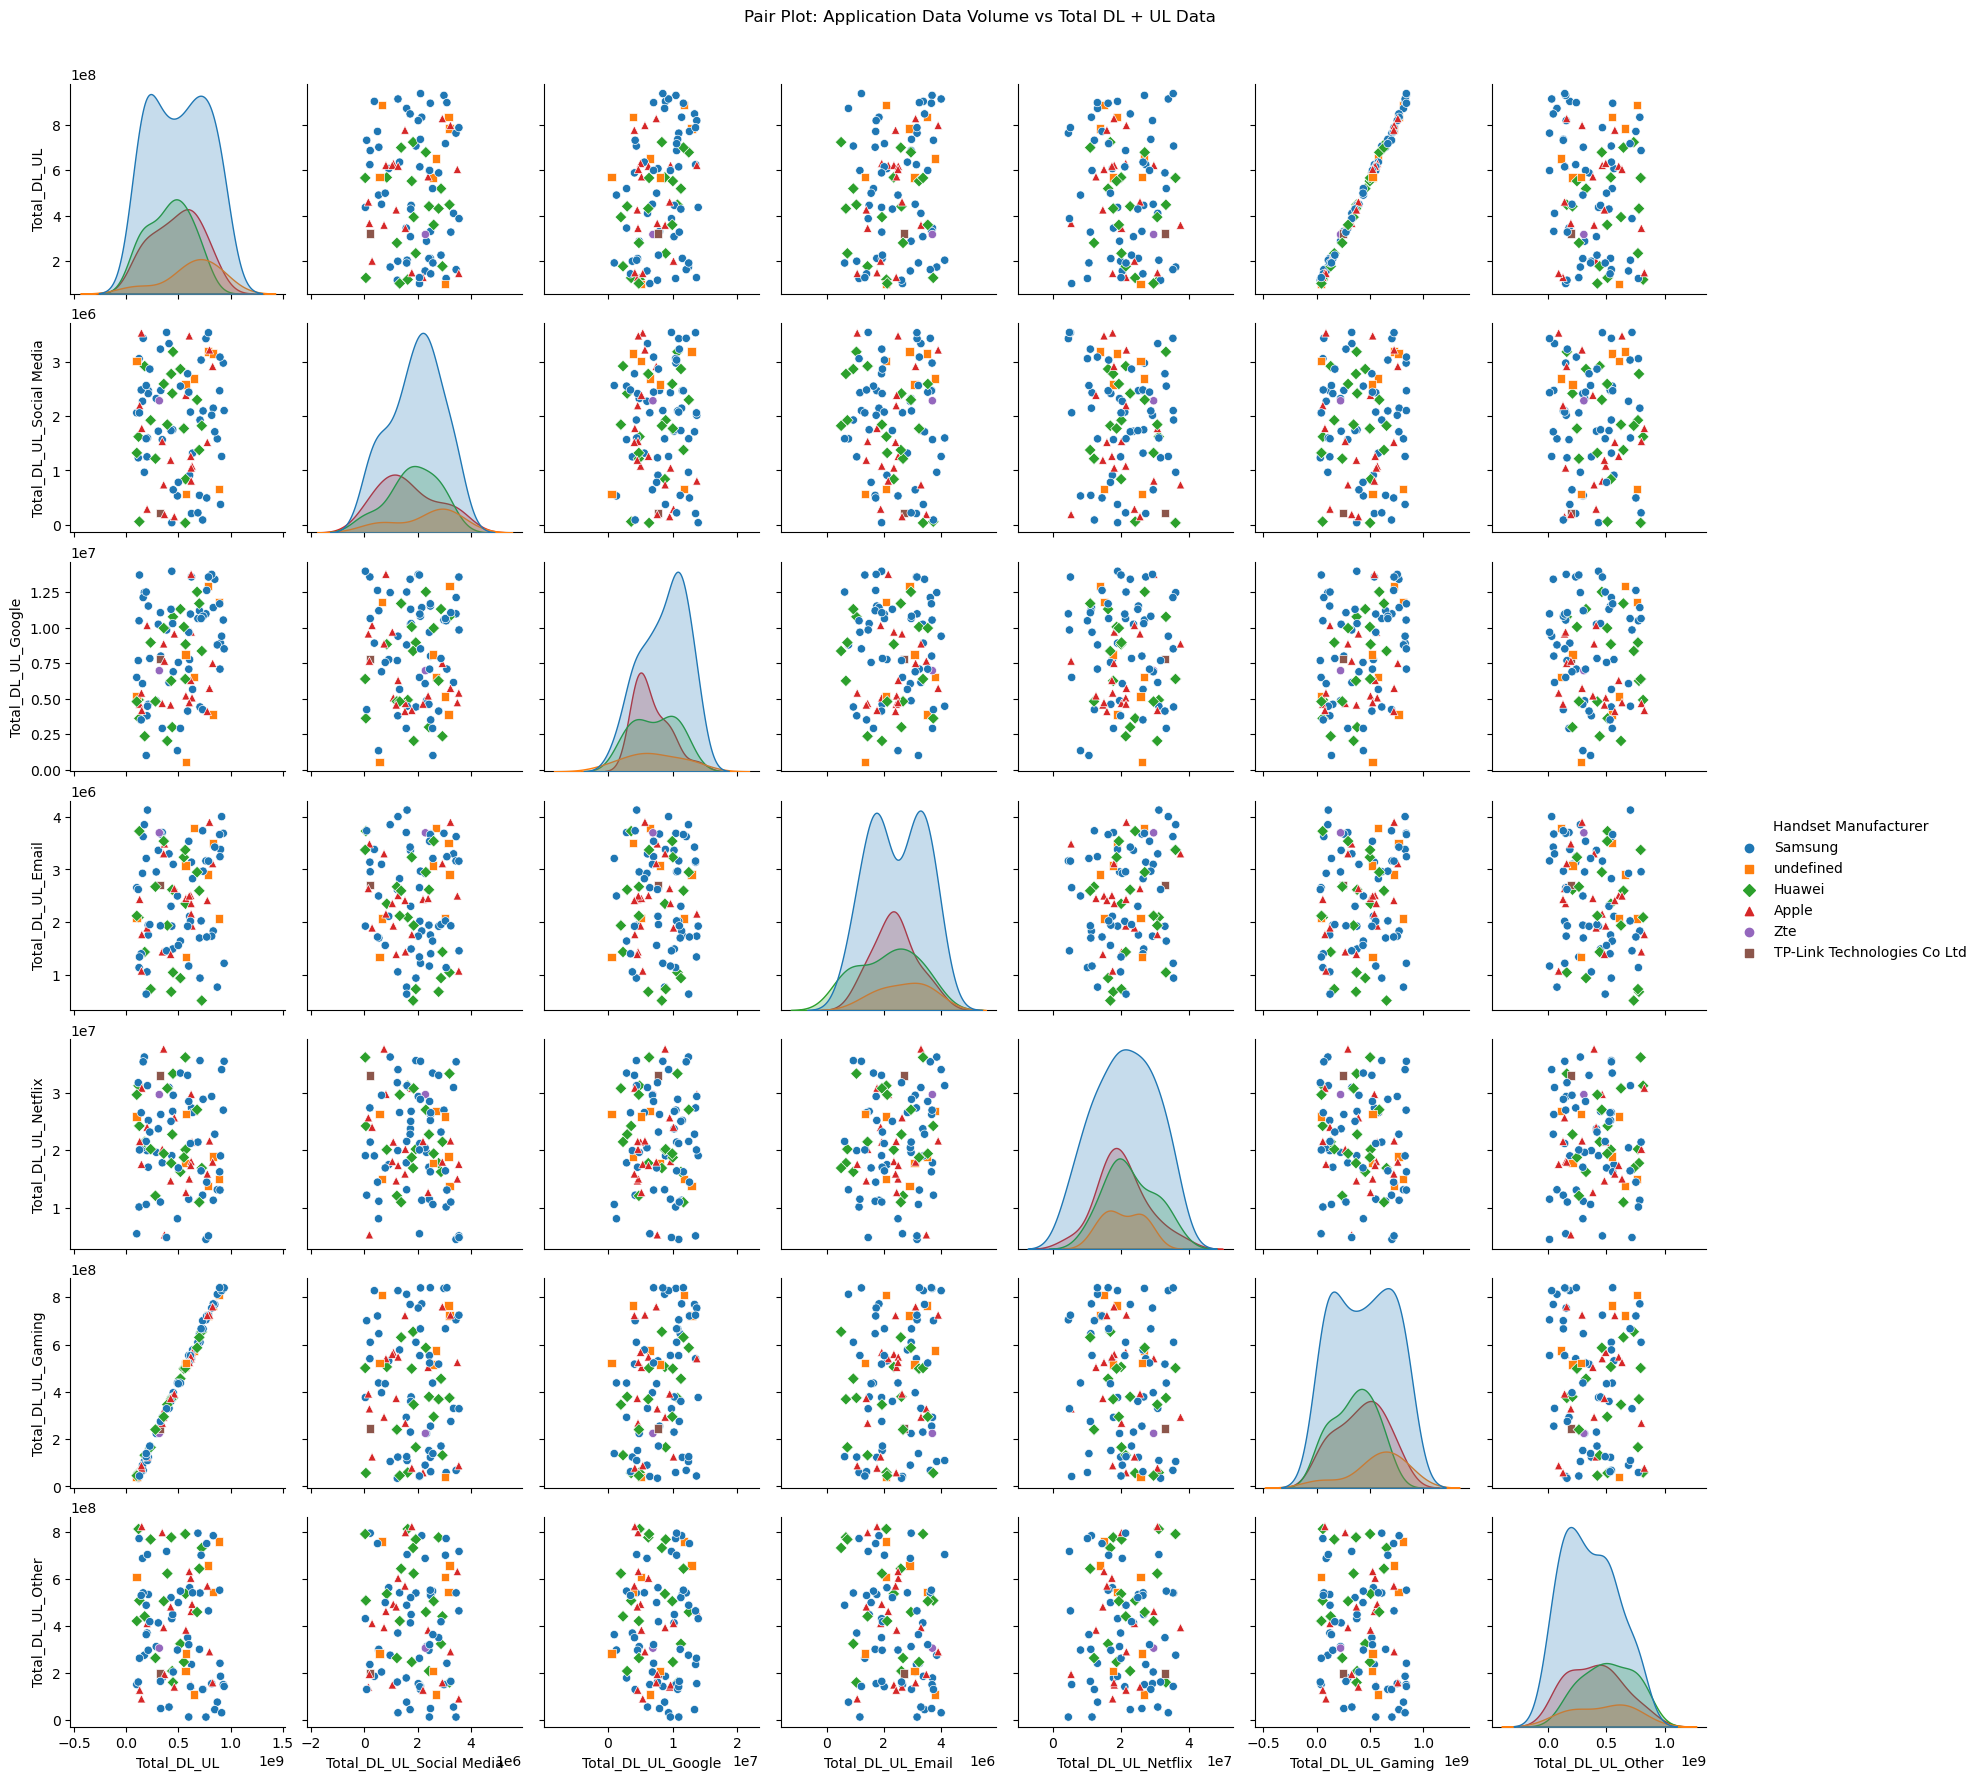

In [68]:
for app in applications:
    dl_col = f'{app} DL (Bytes)'
    ul_col = f'{app} UL (Bytes)'
    if dl_col in df.columns and ul_col in df.columns:
        df[f'Total_DL_UL_{app}'] = df[dl_col] + df[ul_col]

plot_data = df[['Total_DL_UL'] + [f'Total_DL_UL_{app}' for app in applications]]
plot_data['Handset Manufacturer'] = df['Handset Manufacturer']

plt.figure(figsize=(12, 10))
sns.pairplot(plot_data, hue='Handset Manufacturer', diag_kind='kde', markers=['o', 's', 'D', '^'])
plt.suptitle('Pair Plot: Application Data Volume vs Total DL + UL Data', y=1.02)
plt.show()

Variable transformations

In [71]:
total_duration_per_user = df_clean.groupby('MSISDN/Number')['Dur. (ms)'].sum().reset_index()
total_duration_per_user.columns = ['MSISDN/Number', 'Total Duration']

total_duration_per_user['Decile'] = pd.qcut(total_duration_per_user['Total Duration'], q=5, labels=False)

data_per_decile = df_clean.merge(total_duration_per_user[['MSISDN/Number', 'Decile']], on='MSISDN/Number')
total_data_per_decile = data_per_decile.groupby('Decile').agg({'Total DL (Bytes)': 'sum', 'Total UL (Bytes)': 'sum'})

total_data_per_decile['Total Data (DL+UL)'] = total_data_per_decile['Total DL (Bytes)'] + total_data_per_decile['Total UL (Bytes)']

print(total_data_per_decile)

            Total DL (Bytes)     Total UL (Bytes)    Total Data (DL+UL)
Decile                                                                 
0      10,593,944,089,174.00   954,742,960,658.00 11,548,687,049,832.00
1      11,526,214,555,358.00 1,044,427,958,832.00 12,570,642,514,190.00
2      10,609,465,205,111.00   960,517,754,099.00 11,569,982,959,210.00
3      12,816,753,681,013.00 1,157,958,373,734.00 13,974,712,054,747.00
4      22,163,213,338,863.00 2,006,208,594,211.00 24,169,421,933,074.00


Correlation Analysis

In [75]:
selected_columns = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 
                    'Other DL (Bytes)']

selected_data = df_clean[selected_columns]

correlation_matrix = selected_data.corr()

print("Correlation Matrix:")
print(correlation_matrix)

print("\nInterpretation of Findings:")
print("A correlation coefficient close to 1 indicates a strong positive correlation, while a coefficient close to -1 indicates a strong negative correlation.")
print("A coefficient close to 0 indicates no linear correlation.")


Correlation Matrix:
                         Social Media DL (Bytes)  Google DL (Bytes)  \
Social Media DL (Bytes)                     1.00              -0.00   
Google DL (Bytes)                          -0.00               1.00   
Email DL (Bytes)                            0.00              -0.00   
Netflix DL (Bytes)                         -0.00               0.00   
Gaming DL (Bytes)                           0.00              -0.00   
Other DL (Bytes)                            0.01              -0.00   

                         Email DL (Bytes)  Netflix DL (Bytes)  \
Social Media DL (Bytes)              0.00               -0.00   
Google DL (Bytes)                   -0.00                0.00   
Email DL (Bytes)                     1.00                0.00   
Netflix DL (Bytes)                   0.00                1.00   
Gaming DL (Bytes)                    0.00               -0.00   
Other DL (Bytes)                    -0.00               -0.01   

                         G

4. Data Transformation

In [98]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

selected_columns = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 
                    'Netflix DL (Bytes)', 'Gaming DL (Bytes)']

selected_data = df_clean[selected_columns]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)


Explained Variance Ratio:
[0.20117573 0.20069214 0.19988077 0.19944279 0.19880857]
